# Importing libraries and reading dataset:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Black Friday Sales.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Analysis:

In [3]:
data.shape

(550068, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


***From the above table we can draw some basic conclusions as: Product with product ID 'P00265242' is the most popular one. Most of the products were purchase by Man. The age group 25-35 is the major buyer. People from cit category B are major purchasers.***

In [6]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

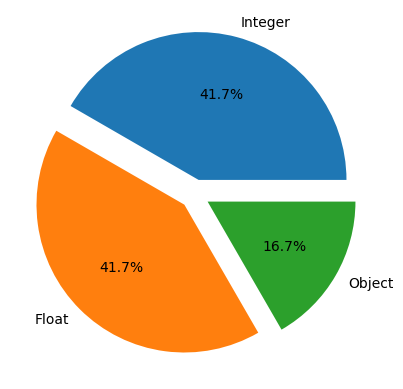

In [7]:
data_types = data.dtypes.value_counts()
plt.pie(data_types, labels = ['Integer','Float','Object'], autopct='%1.1f%%', explode=[0.1,0.1,0.1]);

***Above pie plot shows the percent wise distribution of data and from the plot we can conclude that mostly our data is in numerical format.***

In [8]:
num_columns = [i for i in data.columns if data.dtypes[i] != 'object']
# as 'Purchase' is the target variable so removing that from the list
num_columns.remove('Purchase')
# as 'User_ID' festure will not affect the predictions of algorith so removing thatt from the list
num_columns.remove('User_ID')
print('The numerical columns of the data are:',num_columns)

The numerical columns of the data are: ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [9]:
cat_columns = [j for j in data.columns if data.dtypes[j] == 'object']
print('The categorical columns of the data are:',cat_columns)

The categorical columns of the data are: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [10]:
missing_values = data.isnull().sum()
missing_values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

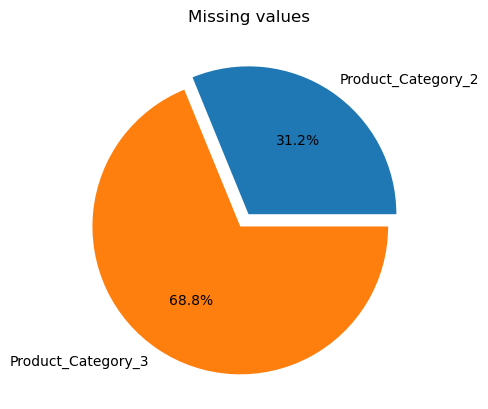

In [11]:
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title('Missing values');

***From the above pieplot we can say that the Product_Category_3 has nearly 70% missing data. So it won't help us much with the predictions. This will enable us to drop that feature.***

In [12]:
data=data.drop('Product_Category_3',axis=1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [13]:
data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [14]:
data['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [15]:
# as the feature 'Product_Category_2' has numerical values and we haven't checked the outliers yet, so filling the missing values with median

median = data['Product_Category_2'].median()
data['Product_Category_2'].fillna(median, inplace=True)

data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


# Data visualisation:

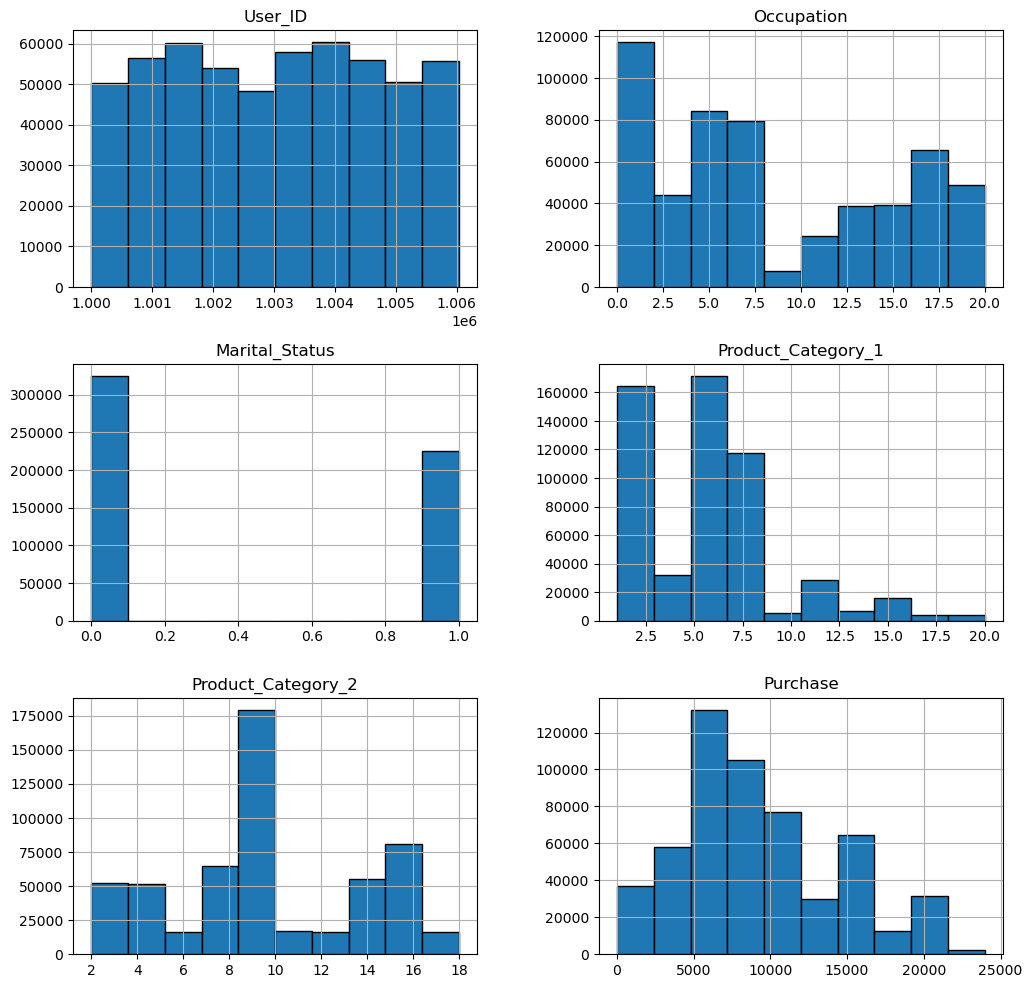

In [17]:
data.hist(edgecolor='black',figsize=(12,12));

***The above graphs just shows us the basic distribution of data across various features***

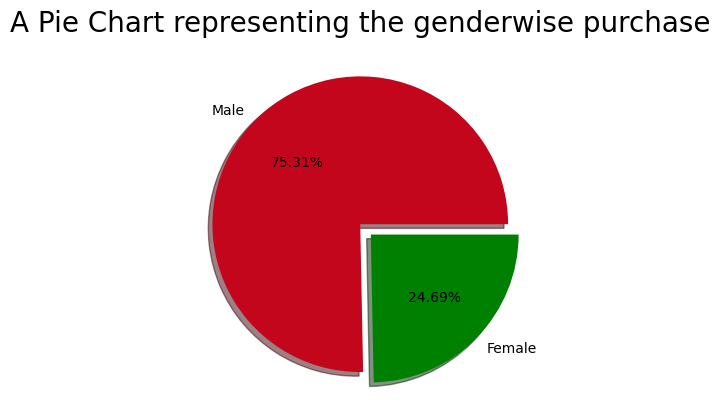

In [17]:
size = data['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the genderwise purchase', fontsize = 20)
plt.show()

***From above pie chart we can say that the men contribute about 75% of purchase during the sale***

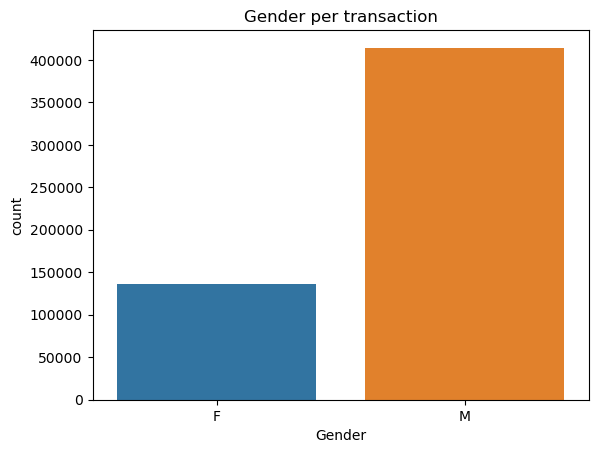

In [18]:
sns.countplot(x=data.Gender)
plt.title('Gender per transaction');

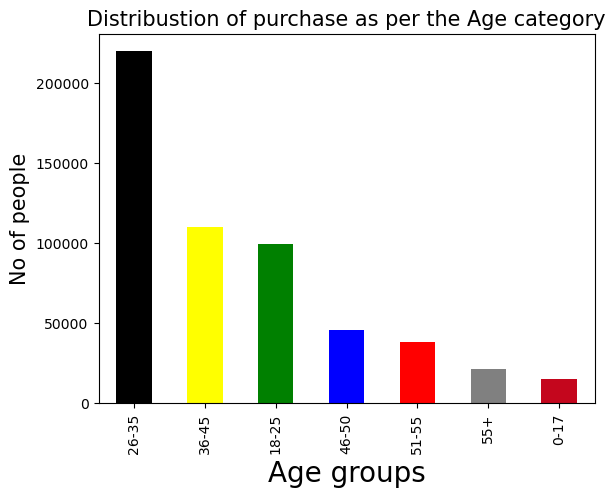

In [19]:
data['Age'].value_counts().plot(kind='bar', color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'])
plt.title('Distribustion of purchase as per the Age category',fontsize=15)
plt.ylabel('No of people',fontsize=15)
plt.xlabel('Age groups',fontsize=20)
plt.show()

***From the above graph we can conclude that majority of the customers belong to the age group 26-35 as we have concluded from the describe function***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10412\142564238.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_by_age = data.groupby(by='Age').sum()['Purchase']


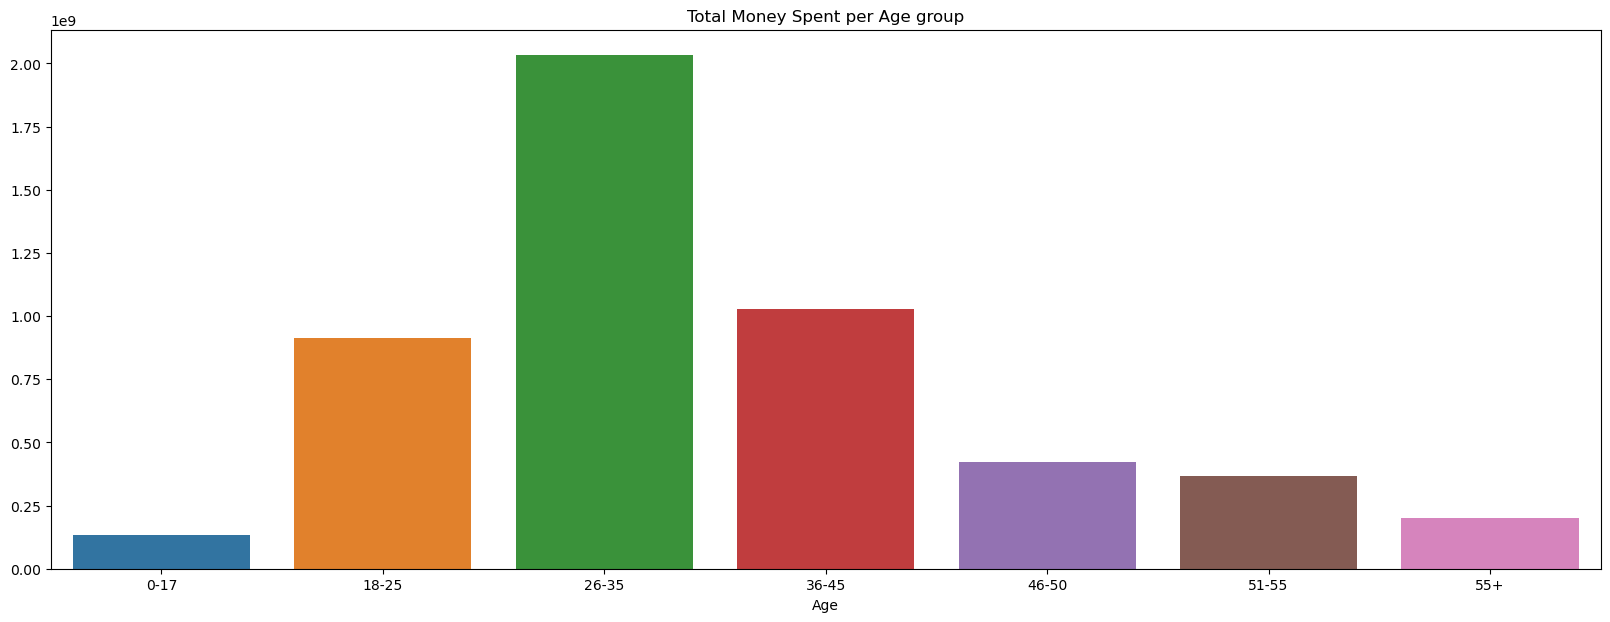

In [20]:
spent_by_age = data.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(20, 7))
sns.barplot(x=spent_by_age.index,y=spent_by_age.values)
plt.title('Total Money Spent per Age group')
plt.show()

***The above distribution shows that the age group 26-35 spents maximum amount on purchase as we have concluded above from the describe function as welL***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10412\1606175864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_by_occ = data.groupby(by='Occupation').sum()['Purchase']


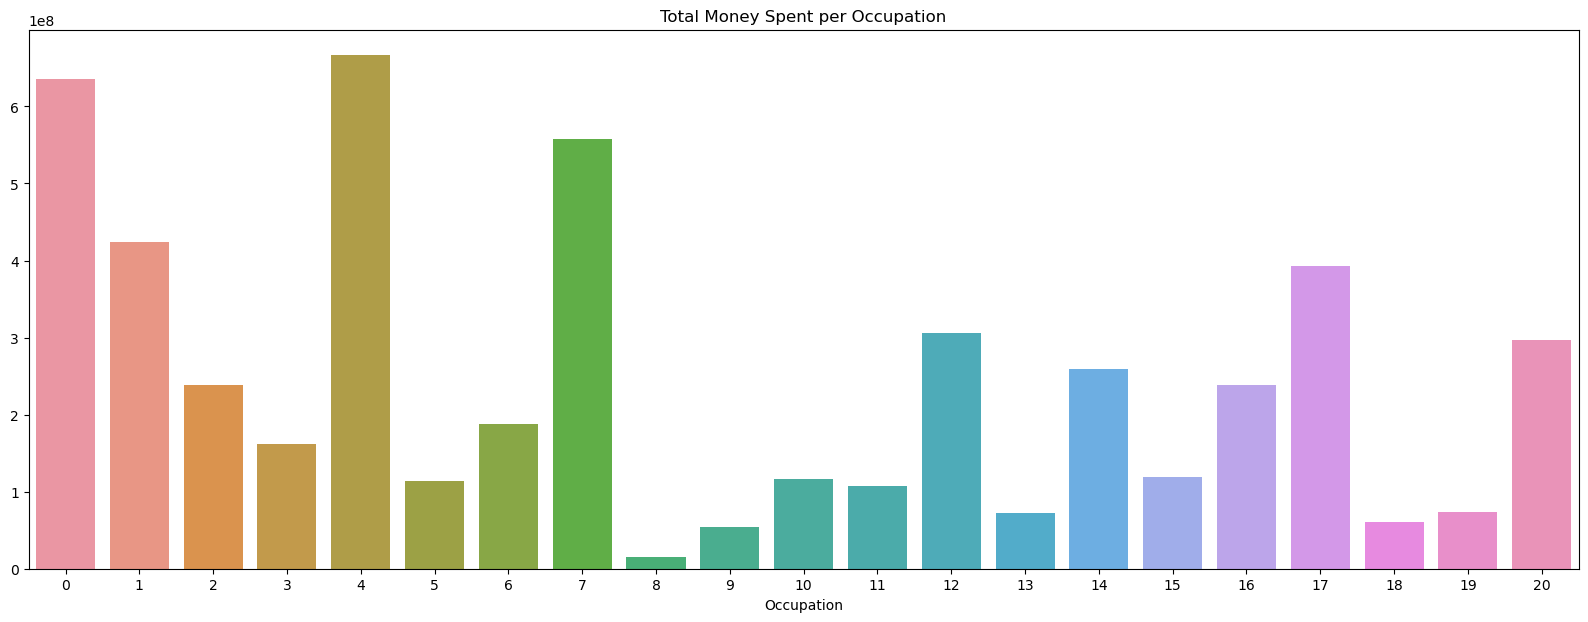

In [21]:
spent_by_occ = data.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))
sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

***From the above graph we can conclude that the occupation category 4 has spent maximum amount***

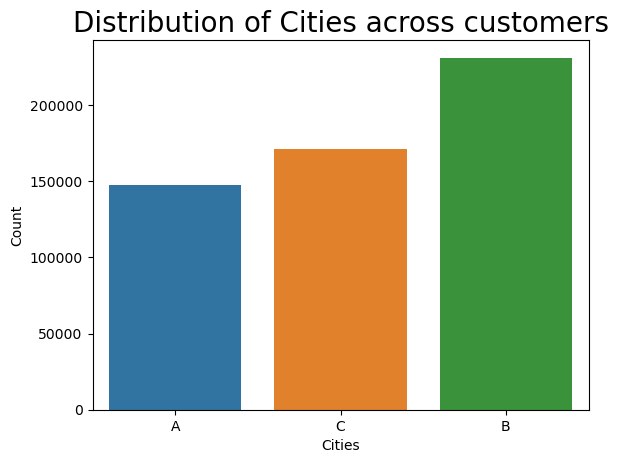

In [22]:
sns.countplot(data=data, x='City_Category')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

***From above graph we can say that people from city B are the major purchaser during Black friday sale***

***Another important feature that needs to be explored here is the product. This is because the profit margin of the store will be affected by the products that the customers will prefer during the sale. As we don't have labeled products in the dataset, we will try to explore categories of the data to draw insights***

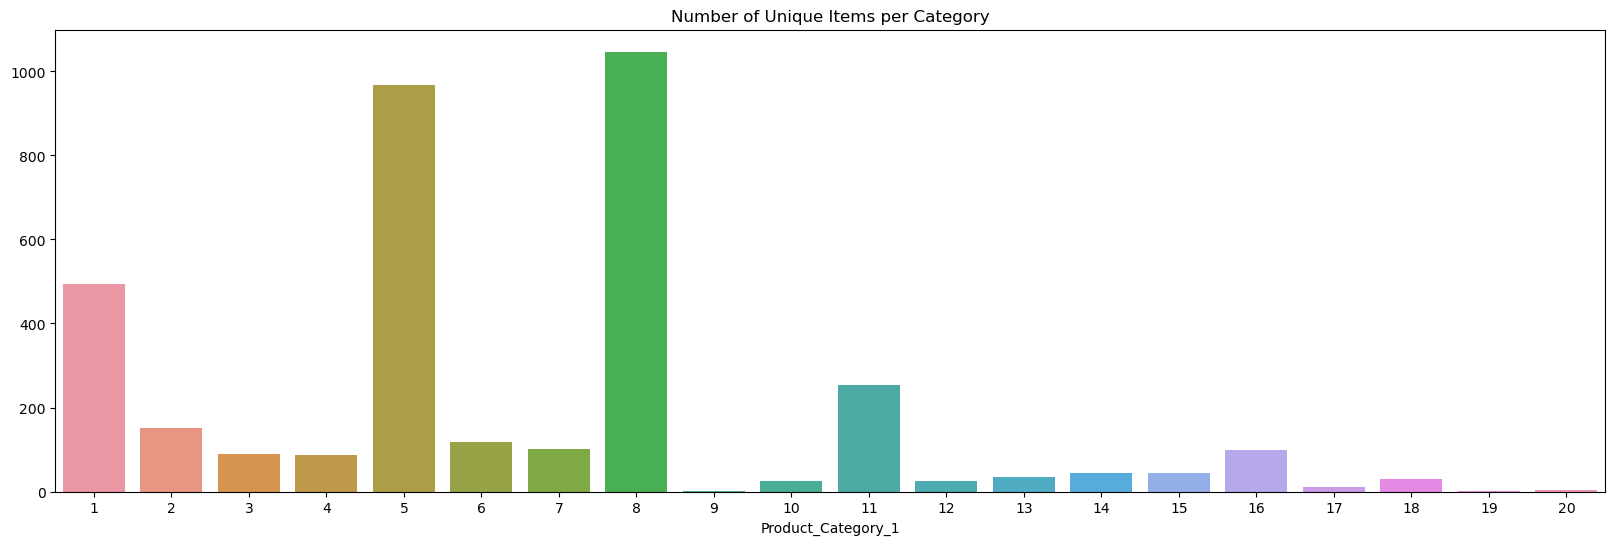

In [23]:
plt.figure(figsize=(20,6))
prod_by_cat = data.groupby('Product_Category_1')['Product_ID'].nunique()
sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values)
plt.title('Number of Unique Items per Category')
plt.show()

***From the graph we can clearly say that label 1, 5 and 8 has most items inside them. In other words, we can say that these categories are broader than other catogries***

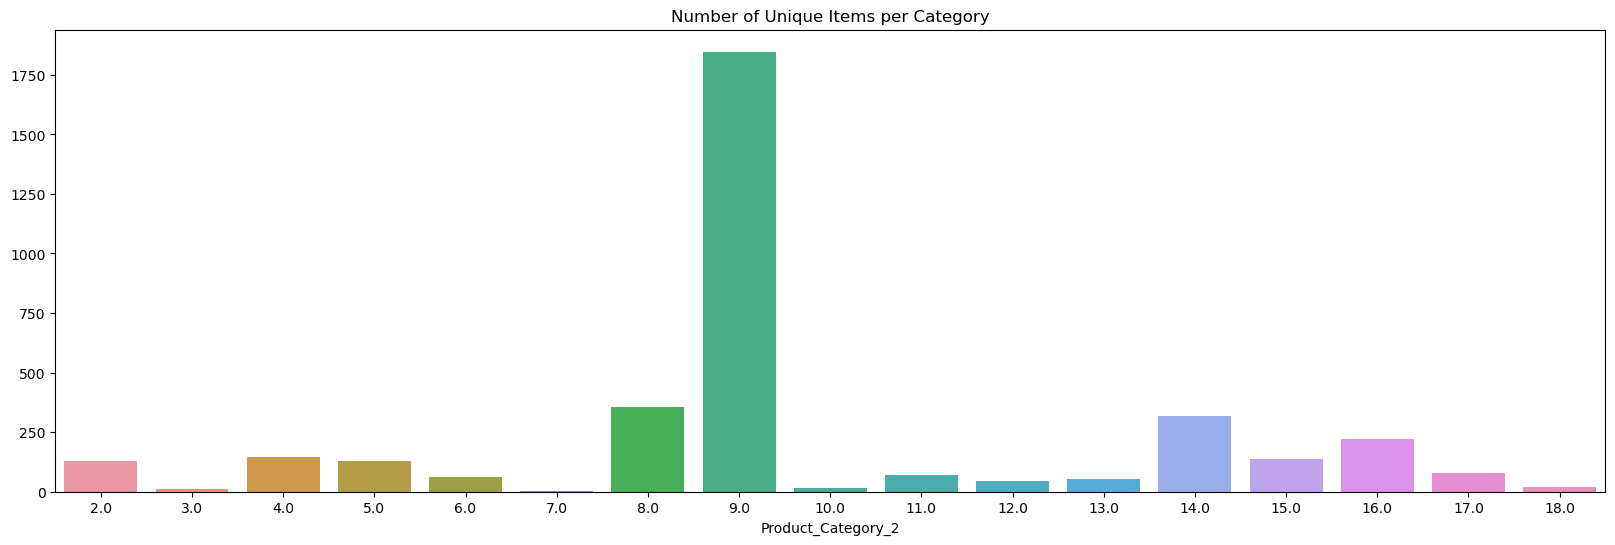

In [24]:
plt.figure(figsize=(20,6))
prod_by_cat = data.groupby('Product_Category_2')['Product_ID'].nunique()
sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values)
plt.title('Number of Unique Items per Category')
plt.show()

***From the graph we can clearly say that label 9 has most items inside them or this category is vast than other catogries***

In [25]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


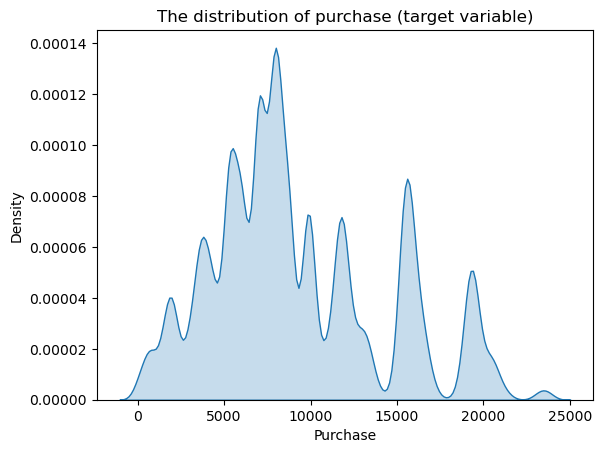

In [87]:
sns.kdeplot(data['Purchase'], fill=True)
plt.title("The distribution of purchase (target variable)")
plt.show()

***The above graph gives us the in general distribution of our target variable***

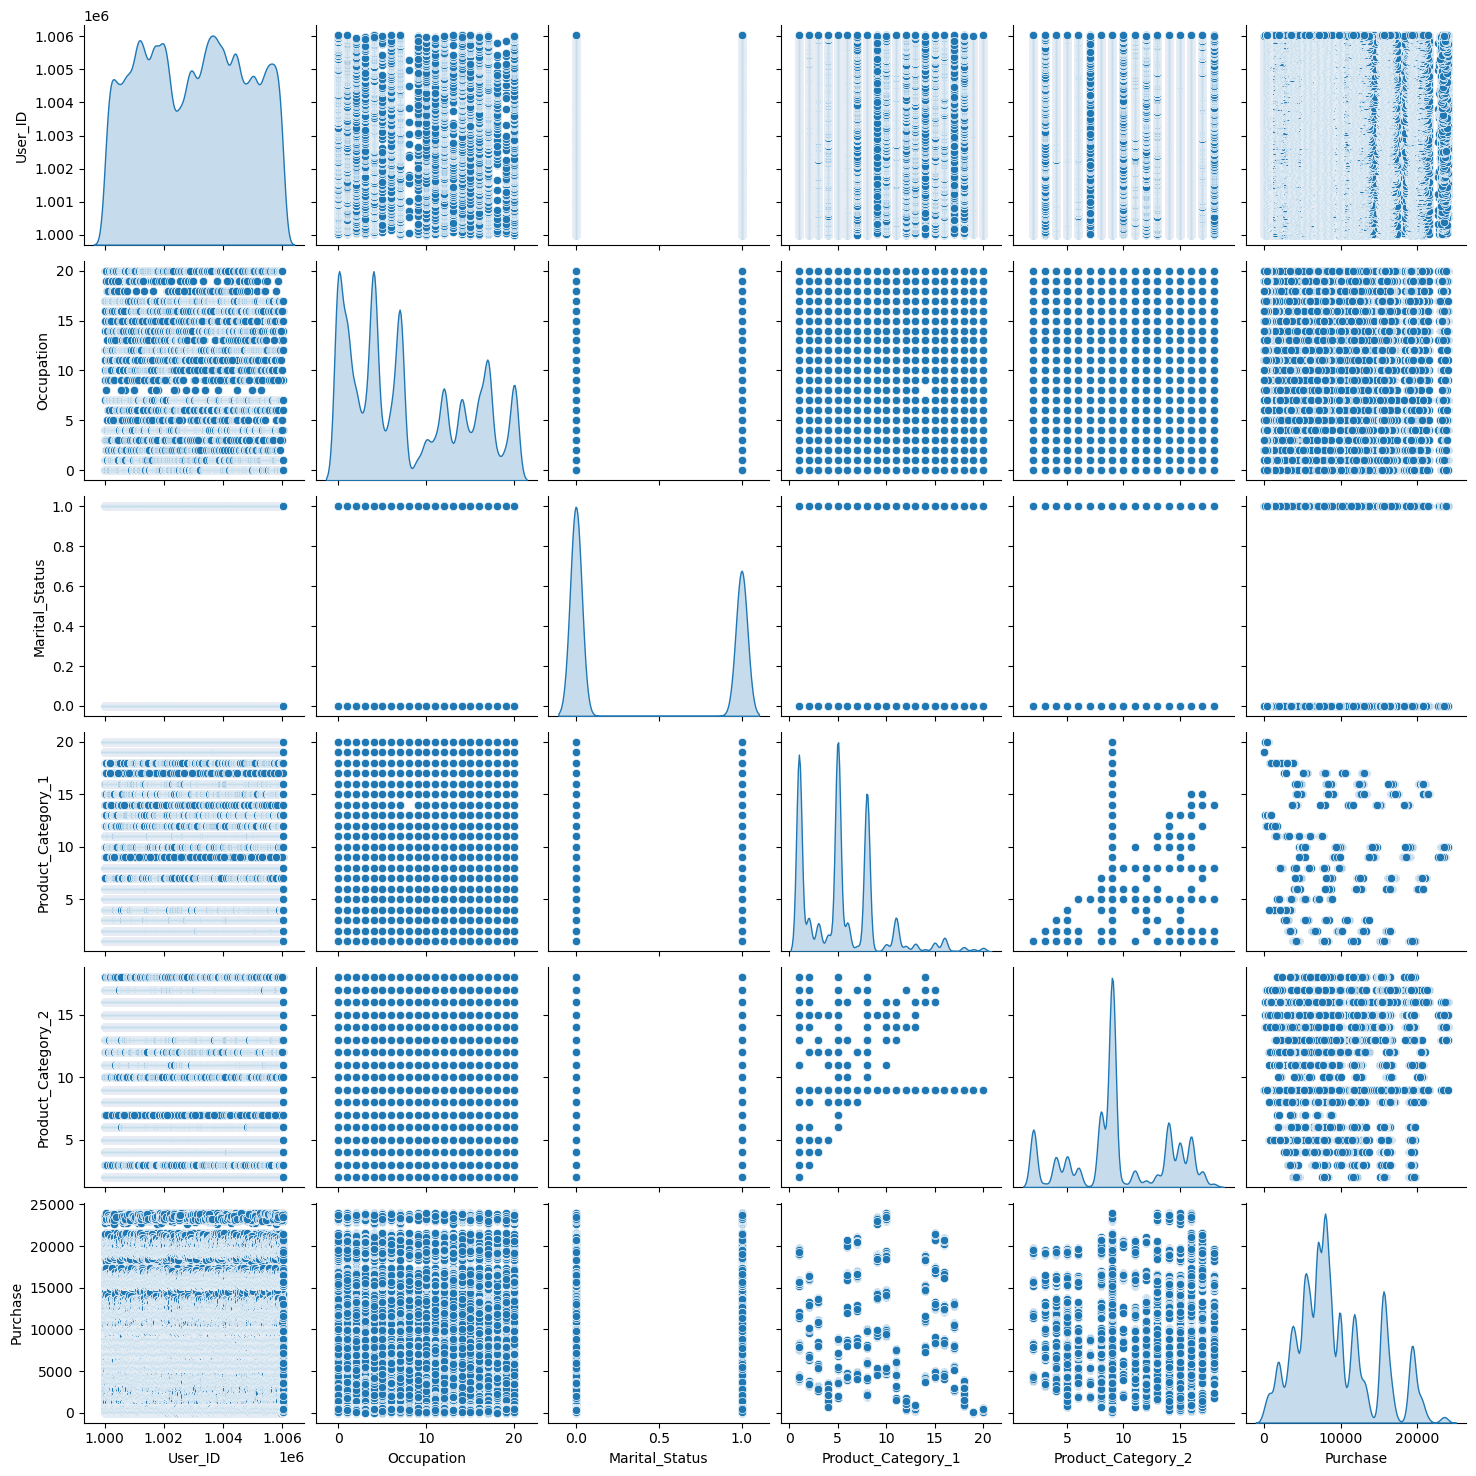

In [30]:
sns.pairplot(data=data, diag_kind='kde')
plt.show()

***The above graphs just help us to see a general trend of the features with each other. To get a better idea of this trend, we will plot a heat map below***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13328\3890406119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap = 'viridis')


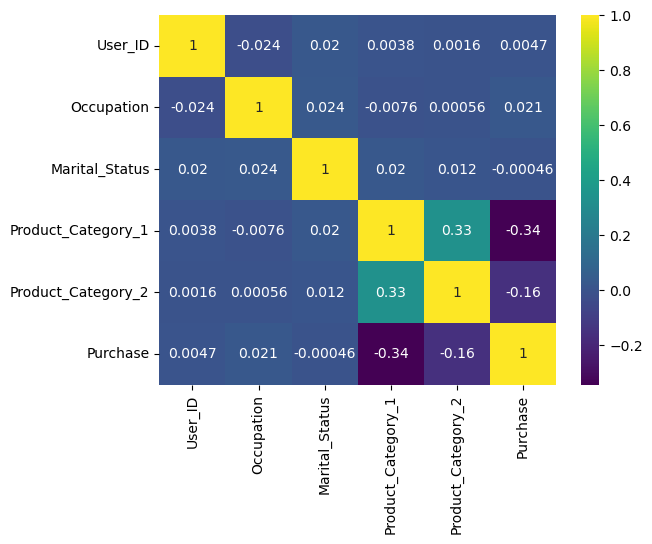

In [31]:
sns.heatmap(data.corr(), annot=True, cmap = 'viridis')
plt.show()

***We can say that the target variable is higly negatively correlated with Product_Category_1 feature and highly postively correlated with feature Occupation.***

# Machine learning:

In [26]:
data = data.drop(['Product_ID','User_ID'],axis=1)
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969


In [27]:
data.shape

(550068, 9)

In [28]:
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [29]:
# encoding the categorical features of the data

cat_colnew = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for var in cat_colnew:
    encode_labels = encoder.fit_transform(data[var])
    data[var]=encode_labels
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.0,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,9.0,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,9.0,7969


In [30]:
data.dtypes

Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

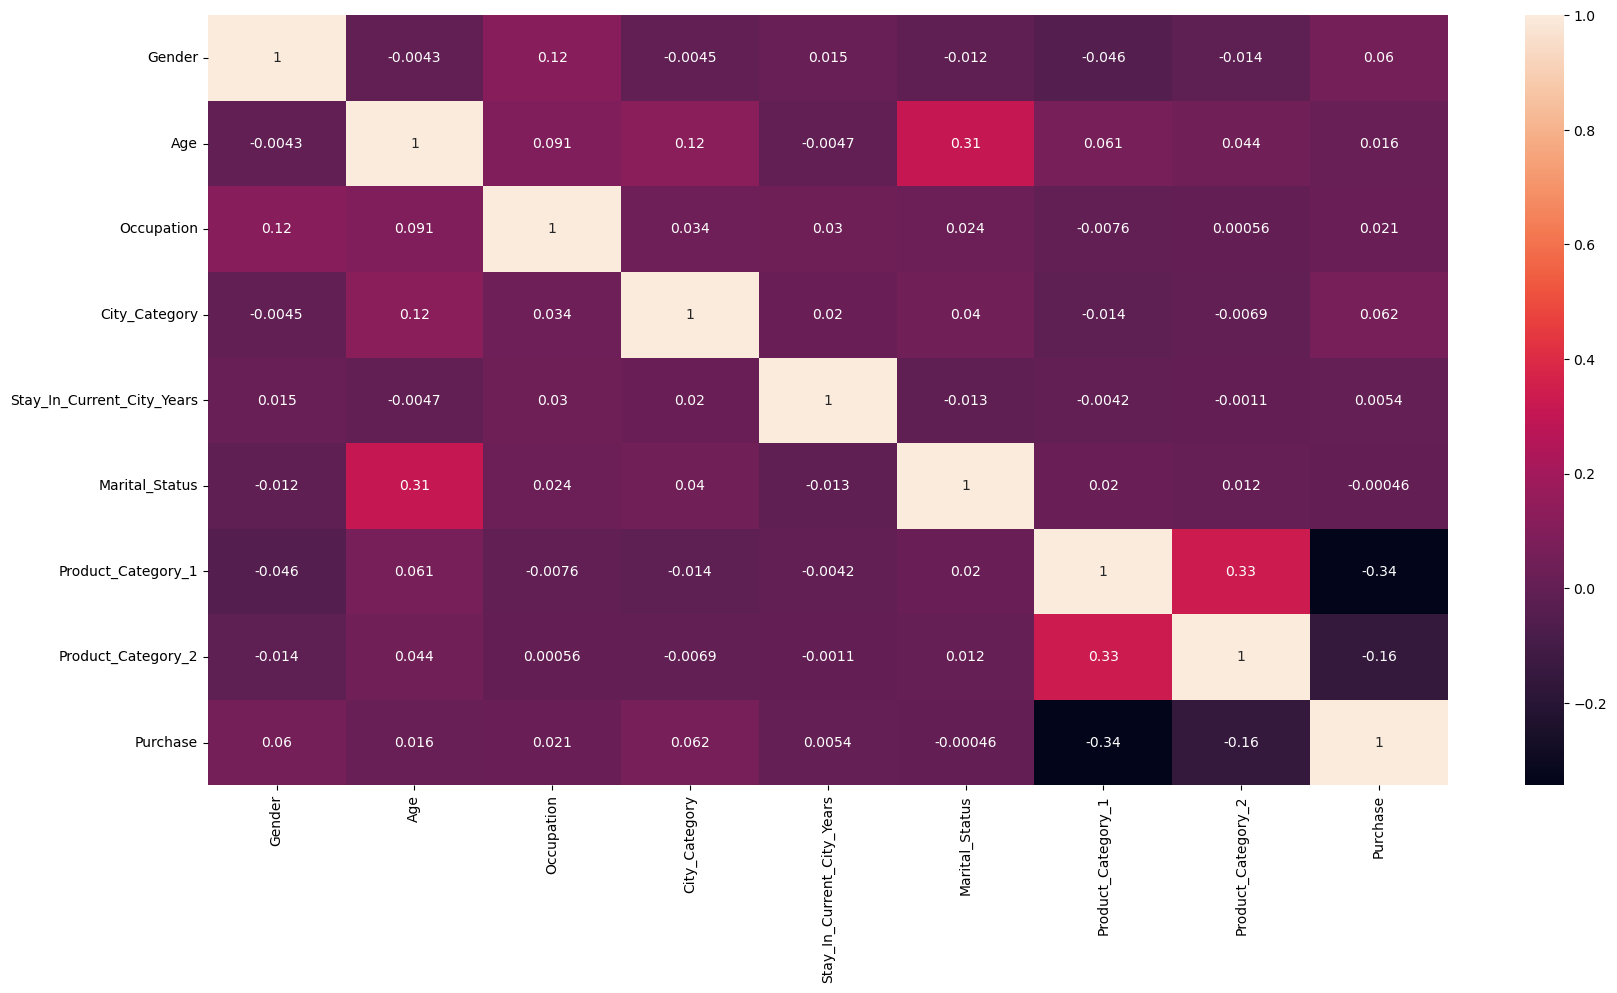

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [31]:
#independt variable

X = data.drop(['Purchase'], axis=1)
print('Independent features are:')
print(X.head())

Independent features are:
   Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       0    0          10              0                           2   
1       0    0          10              0                           2   
2       0    0          10              0                           2   
3       0    0          10              0                           2   
4       1    6          16              2                           4   

   Marital_Status  Product_Category_1  Product_Category_2  
0               0                   3                 9.0  
1               0                   1                 6.0  
2               0                  12                 9.0  
3               0                  12                14.0  
4               0                   8                 9.0  


In [32]:
#dependt variable

Y = data['Purchase']
print('Dependent feature is:')
print(Y.head())

Dependent feature is:
0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64


In [95]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.136401
1,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.846289
2,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-0.136401
3,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.046745
4,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.136401


***We still have 8 independent features with almost 5 lakh records to predict the target variable. This much data will increase the time comlexity of the model and there could a chance of over-fitting. From the heatmap above also we can say that not all the features are correlated with the target variable. So we will use a feature selection technique to select 4 features that will help us get best fit model.***

# Liner Regression:

In [38]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfa

L1 = LinearRegression()
sfa1 = sfa(L1, k_features = 4, forward=True, verbose=1,scoring='neg_mean_squared_error')

In [39]:
lmn = sfa1.fit(X,Y)
feature_names = list(lmn.k_feature_names_)
print('The features for linear model are: ',feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.8s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished
Features: 4/4

The features for linear model are:  ['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_2']


In [40]:
X_new = X[feature_names]
X_new.head()

,Gender,City_Category,Product_Category_1,Product_Category_2
0,0,0,3,9.0
1,0,0,1,6.0
2,0,0,12,9.0
3,0,0,12,14.0
4,1,2,8,9.0


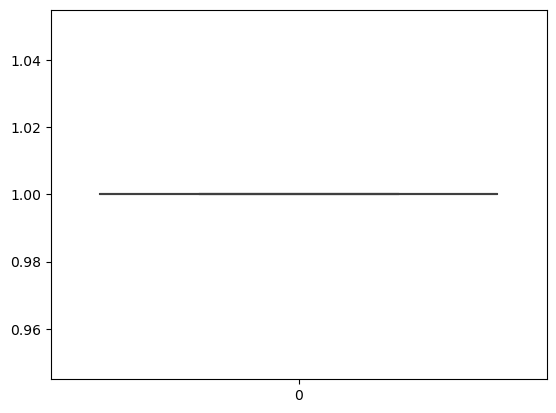

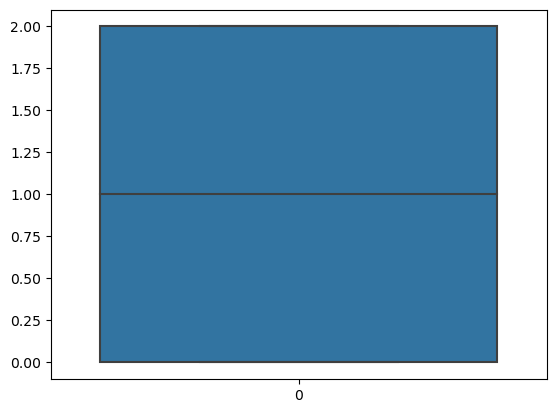

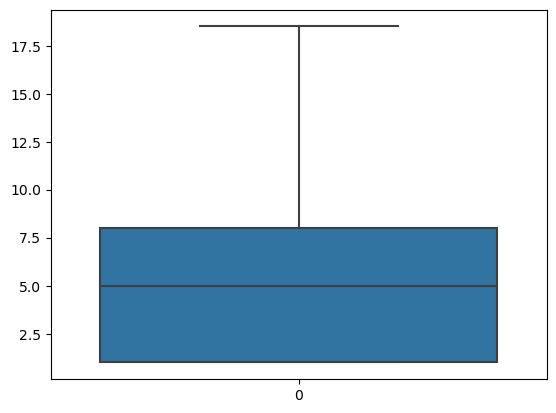

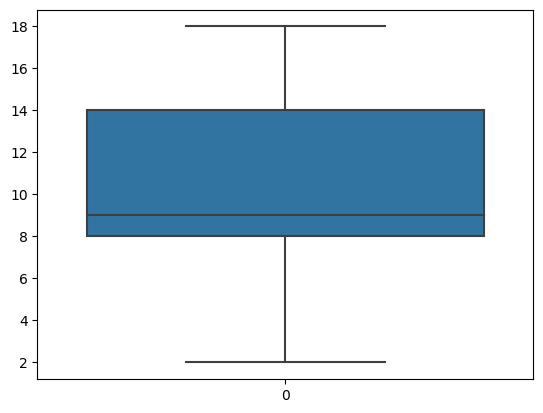

In [41]:
def treat_outlier(var):
    IQR = data[var].quantile(0.75) - data[var].quantile(0.25)
    lower_val = data[var].quantile(0.25) - (IQR * 1.5)
    upper_val = data[var].quantile(0.75) + (IQR * 1.5)
    data.loc[data[var] >= upper_val, var] = upper_val
    data.loc[data[var] <= lower_val, var] = lower_val

for x in feature_names:
    treat_outlier(x)

i=1
for var in feature_names:
    plt.figure(i)
    sns.boxplot(data[var])
    i +=1

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.25)
print("The size of training independent feature is ",X_train.shape)
print("The size of testing independent feature is ",X_test.shape)
print("The size of training dependent feature is ",Y_train.shape)
print("The size of testing dependent feature is ",Y_test.shape)

The size of training independent feature is  (412551, 4)
The size of testing independent feature is  (137517, 4)
The size of training dependent feature is  (412551,)
The size of testing dependent feature is  (137517,)


Applying Regression model, giving out the predictions and using evaluation metrics

In [43]:
L1.fit(X_train,Y_train)

LinearRegression()

In [101]:
from sklearn.metrics import mean_absolute_error

pred1 = L1.predict(X_test)
error_score_test = np.sqrt(mean_absolute_error(Y_test, pred1))
print('The Root mean squared error for test data is: ', error_score_test)

The Root mean squared error for test data is:  59.98277109460554


In [102]:
pred2 = L1.predict(X_train)
error_score_test = np.sqrt(mean_absolute_error(Y_train, pred2))
print('The Root mean squared error for train data is: ', error_score_test)

The Root mean squared error for train data is:  59.94259928790294


In [103]:
# Training Score
L1.score(X_train,Y_train)

0.1251024200019638

In [104]:
# Testing Score
L1.score(X_test,Y_test)

0.12645135695434795

# KNN Regression:

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

***Applying principle componenet technique to find 4 priciple componenets amongst the 8 independent features to reduce complexity of the model***

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=4)
component=pca.fit_transform(X)
data_new=pd.DataFrame(component)
data_new.head()

,0,1,2,3
0,1.880985,-1.996091,-1.520698,-2.600238
1,1.897720,-5.585651,-1.188803,-2.534168
2,1.816397,3.661372,5.475786,-2.786124
3,1.812427,7.548616,2.331338,-2.827395
4,7.990498,1.284986,2.451843,3.146088


In [47]:
x_train,x_test,y_train,y_test = train_test_split(data_new,Y,test_size=0.30,random_state=42)
print("The size of training independent feature is ",x_train.shape)
print("The size of testing independent feature is ",x_test.shape)
print("The size of training dependent feature is ",y_train.shape)
print("The size of testing dependent feature is ",y_test.shape)

The size of training independent feature is  (385047, 4)
The size of testing independent feature is  (165021, 4)
The size of training dependent feature is  (385047,)
The size of testing dependent feature is  (165021,)


In [48]:
knn = KNeighborsRegressor(n_neighbors = 24, weights='uniform',metric='euclidean', algorithm='auto')
knn.fit(x_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=24)

In [49]:
pred1 = knn.predict(x_test)

reg_result = np.sqrt(mean_squared_error(pred1,y_test))
print('The root mean error for test data is,',reg_result)

The root mean error for test data is, 3031.9207827083446


In [51]:
pred2 = knn.predict(x_train)

reg_result_traindata = np.sqrt(mean_squared_error(pred2,y_train))
print('The root mean error for train data is,', reg_result_traindata)

The root mean error for train data is, 2897.881951319141


In [52]:
# Training Score
knn.score(x_train,y_train)

0.6673312928845976

In [54]:
# Testing Score
knn.score(x_test,y_test)

0.635249454199954

# Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
sfa2 = sfa(DTR, k_features = 4, forward=True, verbose=1,scoring='neg_mean_squared_error')

In [61]:
lmn1 = sfa2.fit(X,Y)
feature_names1 = list(lmn.k_feature_names_)
print('The features for Decision Tree Regression model are: ',feature_names1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.7s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.6s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.8s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.8s finished
Features: 4/4

The features for Decision Tree Regression model are:  ['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_2']


***As the relevant features for the Decision tree regression is as that for Logistic regression, and we have stored these features in X_new, we will use the same data to model decision tree regression model***

In [62]:
A_train,A_test,Z_train,Z_test = train_test_split(X_new,Y,test_size=0.40,random_state=42)
print("The size of training independent feature is ",A_train.shape)
print("The size of testing independent feature is ",A_test.shape)
print("The size of training dependent feature is ",Z_train.shape)
print("The size of testing dependent feature is ",Z_test.shape)

The size of training independent feature is  (330040, 4)
The size of testing independent feature is  (220028, 4)
The size of training dependent feature is  (330040,)
The size of testing dependent feature is  (220028,)


In [63]:
DTR.fit(X_train,Y_train)

DecisionTreeRegressor()

In [64]:
predict1 = DTR.predict(A_test)
error_score_test1 = np.sqrt(mean_absolute_error(Z_test, predict1))
print('The Root mean squared error for test data is: ', error_score_test1)

The Root mean squared error for test data is:  47.40779422033847


In [65]:
predict2 = DTR.predict(A_train)
error_score_test1 = np.sqrt(mean_absolute_error(Z_train, predict2))
print('The Root mean squared error for train data is: ', error_score_test1)

The Root mean squared error for train data is:  47.31059949628643


In [66]:
# Training Score
DTR.score(A_train,Z_train)

0.6506612226333472

In [68]:
# Testing Score
DTR.score(A_test,Z_test)

0.6452302395845384

***Haven't applied the hyper parameter selection techniques in the project as becuase of the size of data the kernel was not responding and the Random Forest regression was not implemented for the same reason***

# Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [72]:
RF_model=RandomForestRegressor(random_state=42)

***Finding the best fit parameters for the random forest regression model***

In [74]:
grid_params = {'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],'max_depth':range(1,30),
                'min_samples_leaf':range(1,50),'min_samples_split':range(1,50)}

In [76]:
grid_search = RandomizedSearchCV(RF_model, grid_params, verbose=1, cv = 5, n_jobs=-1)
grid_search

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 50),
                                        'min_samples_split': range(1, 50)},
                   verbose=1)

In [ ]:
grid_result = grid_search.fit(A_train,Z_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
